In [1]:
from apportionment import *

C:\Users\janko\AppData\Local\Temp\ipykernel_2144\2250706796.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Total Voters"] = df["Year"].map(constants.all_voters)
C:\Users\janko\AppData\Local\Temp\ipykernel_2144\2250706796.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["No Valid Votes"] = df["Year"].map(constants.no_valid_vote)
C:\Users\janko\AppData\Local\Temp\ipykernel_2144\2250706796.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

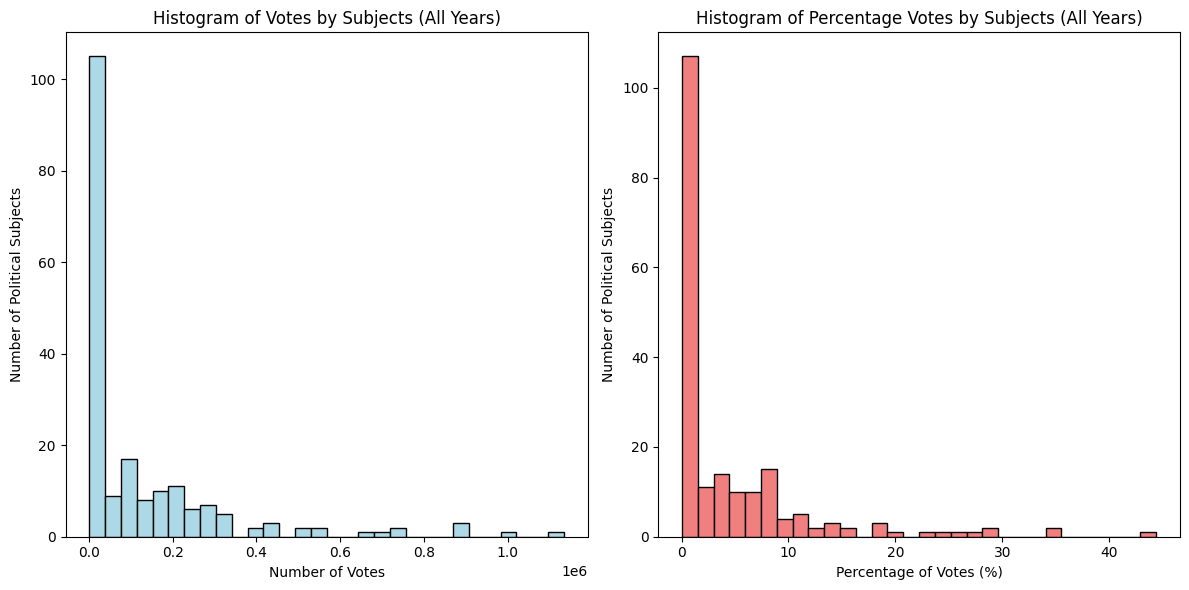

In [2]:
# Function to read CSV files for each year
def read_election_data():
    # Get all CSV files in the specified directory matching the pattern
    files = [(f'./real_data/NRSR{year}_clean.csv', year) for year in constants.years]
    all_data = []
    for file, year in files:
        df = pd.read_csv(file)
        df['Year'] = year
        all_data.append(df)
    combined_data = pd.concat(all_data, ignore_index=True)
    return combined_data

# Read election data
combined_data = read_election_data()

# Filter out political subjects with zero Subject Number
filtered_data = combined_data[combined_data["Subject Number"] > 0]


# Function to plot histograms of votes and percentages for combined data
def plot_histograms(df):
    df["Total Voters"] = df["Year"].map(constants.all_voters)
    df["No Valid Votes"] = df["Year"].map(constants.no_valid_vote)
    df["Percentage"] = (df["Valid Votes"] / (df["Total Voters"] - df["No Valid Votes"])) * 100

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot histogram of votes
    axes[0].hist(df["Valid Votes"], bins=30, color='lightblue', edgecolor='black')
    axes[0].set_xlabel('Number of Votes')
    axes[0].set_ylabel('Number of Political Subjects')
    axes[0].set_title('Histogram of Votes by Subjects (All Years)')
    
    # Plot histogram of percentages
    axes[1].hist(df["Percentage"], bins=30, color='lightcoral', edgecolor='black')
    axes[1].set_xlabel('Percentage of Votes (%)')
    axes[1].set_ylabel('Number of Political Subjects')
    axes[1].set_title('Histogram of Percentage Votes by Subjects (All Years)')
    
    plt.tight_layout()
    plt.show()

# Plot the histograms for the filtered data
plot_histograms(filtered_data)


C:\Users\janko\AppData\Local\Temp\ipykernel_2144\1331529819.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Total Voters"] = df["Year"].map(constants.all_voters)
C:\Users\janko\AppData\Local\Temp\ipykernel_2144\1331529819.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["No Valid Votes"] = df["Year"].map(constants.no_valid_vote)
C:\Users\janko\AppData\Local\Temp\ipykernel_2144\1331529819.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

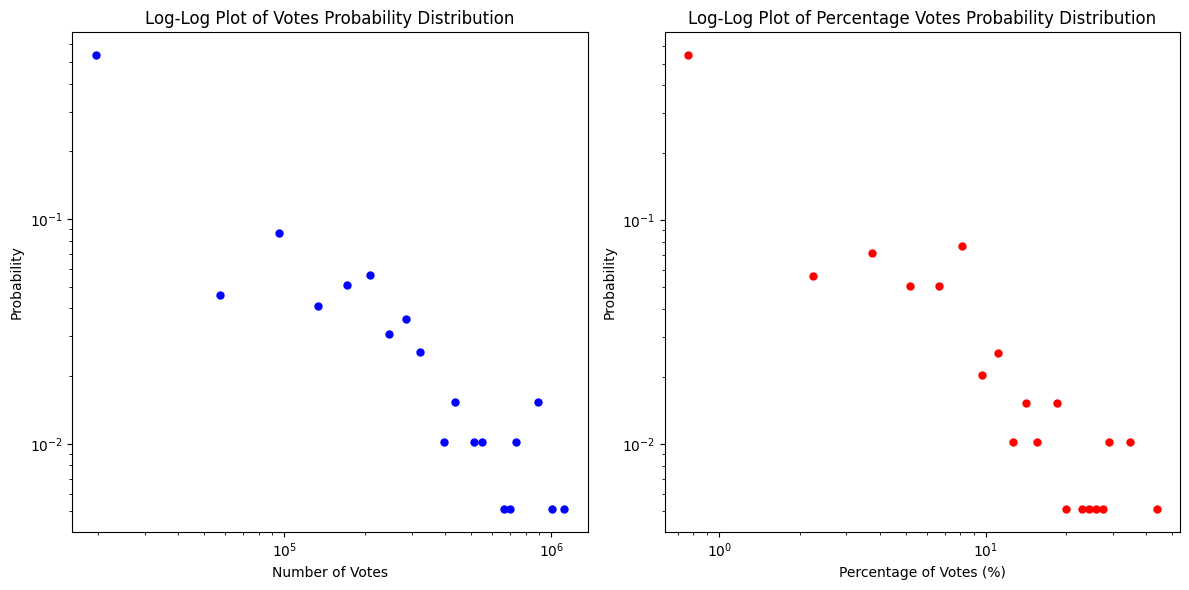

In [3]:

# Function to plot log-log plots of probability distributions
def plot_log_log_histograms(df):
    df["Total Voters"] = df["Year"].map(constants.all_voters)
    df["No Valid Votes"] = df["Year"].map(constants.no_valid_vote)
    df["Percentage"] = (df["Valid Votes"] / (df["Total Voters"] - df["No Valid Votes"])) * 100

    # Histogram for votes
    counts_votes, bins_votes = np.histogram(df["Valid Votes"], bins=30)
    bin_centers_votes = 0.5 * (bins_votes[1:] + bins_votes[:-1])
    prob_votes = counts_votes / counts_votes.sum()

    # Histogram for percentages
    counts_percentage, bins_percentage = np.histogram(df["Percentage"], bins=30)
    bin_centers_percentage = 0.5 * (bins_percentage[1:] + bins_percentage[:-1])
    prob_percentage = counts_percentage / counts_percentage.sum()

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot log-log plot of votes
    axes[0].loglog(bin_centers_votes, prob_votes, 'o', markersize=5, color='blue')
    axes[0].set_xlabel('Number of Votes')
    axes[0].set_ylabel('Probability')
    axes[0].set_title('Log-Log Plot of Votes Probability Distribution')
    
    # Plot log-log plot of percentages
    axes[1].loglog(bin_centers_percentage, prob_percentage, 'o', markersize=5, color='red')
    axes[1].set_xlabel('Percentage of Votes (%)')
    axes[1].set_ylabel('Probability')
    axes[1].set_title('Log-Log Plot of Percentage Votes Probability Distribution')
    
    plt.tight_layout()
    plt.show()

# Plot the log-log plots for the filtered data
plot_log_log_histograms(filtered_data)


C:\Users\janko\AppData\Local\Temp\ipykernel_2144\4190357051.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Total Voters"] = df["Year"].map(constants.all_voters)
C:\Users\janko\AppData\Local\Temp\ipykernel_2144\4190357051.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["No Valid Votes"] = df["Year"].map(constants.no_valid_vote)
C:\Users\janko\AppData\Local\Temp\ipykernel_2144\4190357051.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

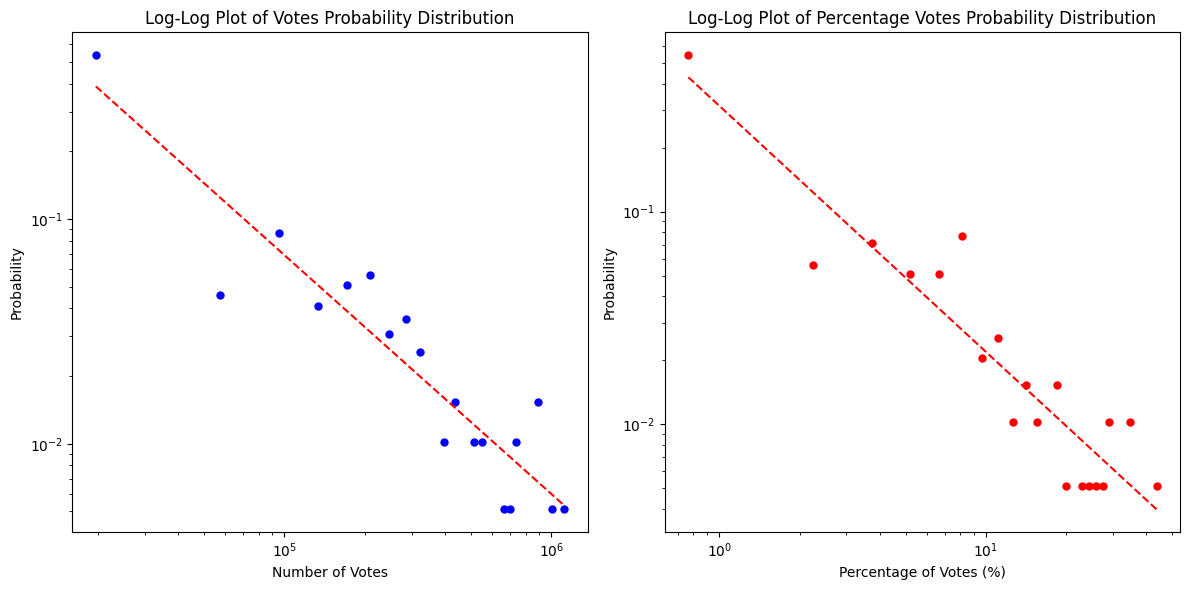

In [4]:
from scipy.stats import linregress

# Function to read CSV files for each year
def read_election_data():
    # Get all CSV files in the specified directory matching the pattern
    files = [(f'./real_data/NRSR{year}_clean.csv', year) for year in constants.years]
    all_data = []
    for file, year in files:
        df = pd.read_csv(file)
        df['Year'] = year
        all_data.append(df)
    combined_data = pd.concat(all_data, ignore_index=True)
    return combined_data

# Read election data
combined_data = read_election_data()

# Filter out political subjects with zero Subject Number
filtered_data = combined_data[combined_data["Subject Number"] > 0]

# Function to plot log-log plots of probability distributions with linear regression
def plot_log_log_histograms_with_regression(df):
    df["Total Voters"] = df["Year"].map(constants.all_voters)
    df["No Valid Votes"] = df["Year"].map(constants.no_valid_vote)
    df["Percentage"] = (df["Valid Votes"] / (df["Total Voters"] - df["No Valid Votes"])) * 100

    # Histogram for votes
    counts_votes, bins_votes = np.histogram(df["Valid Votes"], bins=30)
    bin_centers_votes = 0.5 * (bins_votes[1:] + bins_votes[:-1])
    prob_votes = counts_votes / counts_votes.sum()

    # Histogram for percentages
    counts_percentage, bins_percentage = np.histogram(df["Percentage"], bins=30)
    bin_centers_percentage = 0.5 * (bins_percentage[1:] + bins_percentage[:-1])
    prob_percentage = counts_percentage / counts_percentage.sum()

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot log-log plot of votes
    axes[0].loglog(bin_centers_votes, prob_votes, 'o', markersize=5, color='blue')
    axes[0].set_xlabel('Number of Votes')
    axes[0].set_ylabel('Probability')
    axes[0].set_title('Log-Log Plot of Votes Probability Distribution')
    
    # Linear regression for votes
    log_bin_centers_votes = np.log10(bin_centers_votes[prob_votes > 0])
    log_prob_votes = np.log10(prob_votes[prob_votes > 0])
    slope_votes, intercept_votes, _, _, _ = linregress(log_bin_centers_votes, log_prob_votes)
    regression_line_votes = 10**(intercept_votes + slope_votes * log_bin_centers_votes)
    axes[0].loglog(bin_centers_votes[prob_votes > 0], regression_line_votes, 'r--', label=f'Slope = {slope_votes:.2f}')

    # Plot log-log plot of percentages
    axes[1].loglog(bin_centers_percentage, prob_percentage, 'o', markersize=5, color='red')
    axes[1].set_xlabel('Percentage of Votes (%)')
    axes[1].set_ylabel('Probability')
    axes[1].set_title('Log-Log Plot of Percentage Votes Probability Distribution')
    
    # Linear regression for percentages
    log_bin_centers_percentage = np.log10(bin_centers_percentage[prob_percentage > 0])
    log_prob_percentage = np.log10(prob_percentage[prob_percentage > 0])
    slope_percentage, intercept_percentage, _, _, _ = linregress(log_bin_centers_percentage, log_prob_percentage)
    regression_line_percentage = 10**(intercept_percentage + slope_percentage * log_bin_centers_percentage)
    axes[1].loglog(bin_centers_percentage[prob_percentage > 0], regression_line_percentage, 'r--', label=f'Slope = {slope_percentage:.2f}')

    plt.tight_layout()
    plt.show()

# Plot the log-log plots with linear regression for the filtered data
plot_log_log_histograms_with_regression(filtered_data)


C:\Users\janko\AppData\Local\Temp\ipykernel_2144\2568726209.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Total Voters"] = df["Year"].map(constants.all_voters)
C:\Users\janko\AppData\Local\Temp\ipykernel_2144\2568726209.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["No Valid Votes"] = df["Year"].map(constants.no_valid_vote)
C:\Users\janko\AppData\Local\Temp\ipykernel_2144\2568726209.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

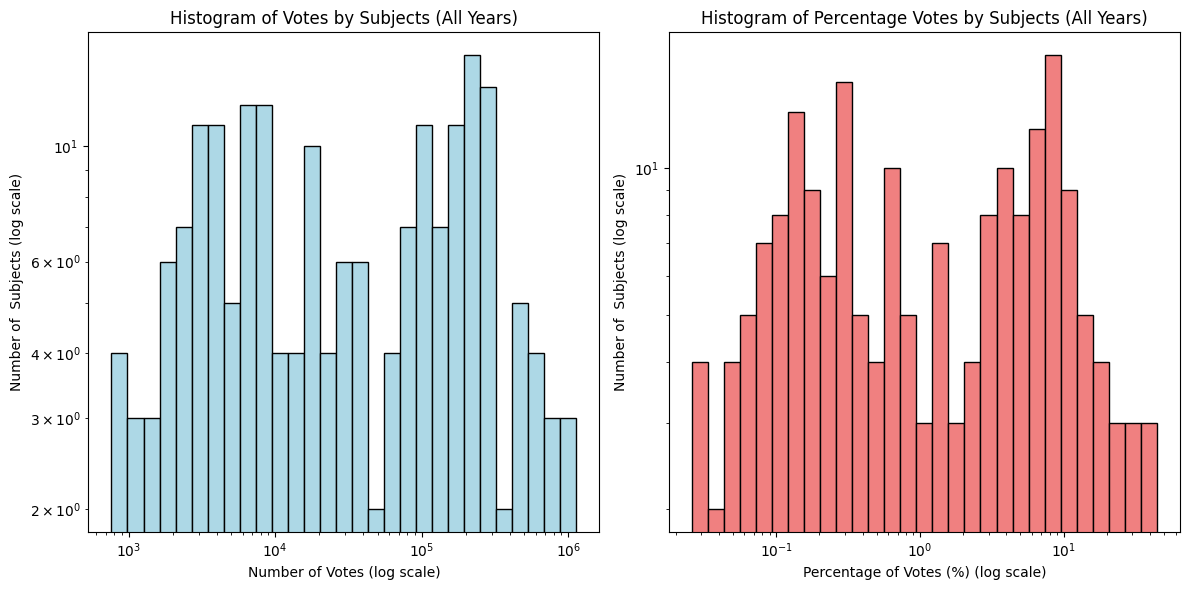

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import constants

# Function to read CSV files for each year
def read_election_data():
    # Get all CSV files in the specified directory matching the pattern
    files = [(f'./real_data/NRSR{year}_clean.csv', year) for year in constants.years]
    all_data = []
    for file, year in files:
        df = pd.read_csv(file)
        df['Year'] = year
        all_data.append(df)
    combined_data = pd.concat(all_data, ignore_index=True)
    return combined_data

# Read election data
combined_data = read_election_data()

# Filter out political subjects with zero Subject Number
filtered_data = combined_data[combined_data["Subject Number"] > 0]

# Function to plot histograms of votes and percentages for combined data
def plot_histograms(df):
    df["Total Voters"] = df["Year"].map(constants.all_voters)
    df["No Valid Votes"] = df["Year"].map(constants.no_valid_vote)
    df["Percentage"] = (df["Valid Votes"] / (df["Total Voters"] - df["No Valid Votes"])) * 100

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Define logarithmic bins for votes
    min_votes = df["Valid Votes"].min()
    max_votes = df["Valid Votes"].max()
    log_bins_votes = np.logspace(np.log10(min_votes), np.log10(max_votes), num=30)

    # Define logarithmic bins for percentage
    min_percentage = df["Percentage"].min()
    max_percentage = df["Percentage"].max()
    log_bins_percentage = np.logspace(np.log10(min_percentage), np.log10(max_percentage), num=30)
    
    # Plot histogram of votes with log scale
    axes[0].hist(df["Valid Votes"], bins=log_bins_votes, color='lightblue', edgecolor='black')
    axes[0].set_xlabel('Number of Votes (log scale)')
    axes[0].set_ylabel('Number of  Subjects (log scale)')
    axes[0].set_title('Histogram of Votes by Subjects (All Years)')
    axes[0].set_xscale('log')
    axes[0].set_yscale('log')
    
    # Plot histogram of percentages with log scale
    axes[1].hist(df["Percentage"], bins=log_bins_percentage, color='lightcoral', edgecolor='black')
    axes[1].set_xlabel('Percentage of Votes (%) (log scale)')
    axes[1].set_ylabel('Number of  Subjects (log scale)')
    axes[1].set_title('Histogram of Percentage Votes by Subjects (All Years)')
    axes[1].set_xscale('log')
    axes[1].set_yscale('log')
    
    plt.tight_layout()
    plt.show()

# Plot the histograms for the filtered data
plot_histograms(filtered_data)


C:\Users\janko\AppData\Local\Temp\ipykernel_2144\1623263749.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Total Voters"] = filtered_data["Year"].map(constants.all_voters)
C:\Users\janko\AppData\Local\Temp\ipykernel_2144\1623263749.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["No Valid Votes"] = filtered_data["Year"].map(constants.no_valid_vote)
C:\Users\janko\AppData\Local\Temp\ipykernel_2144\1623263749.py:32: SettingWithCopyWarning: 
A value is trying to be set o

Calculating best minimal value for power law fit
Log-likelihood ratio (Votes): -0.01390434542685579, p-value (Votes): 0.9889062949161802
Calculating best minimal value for power law fit
Log-likelihood ratio (Percentage): 0.20962105442990162, p-value (Percentage): 0.8339634456580058


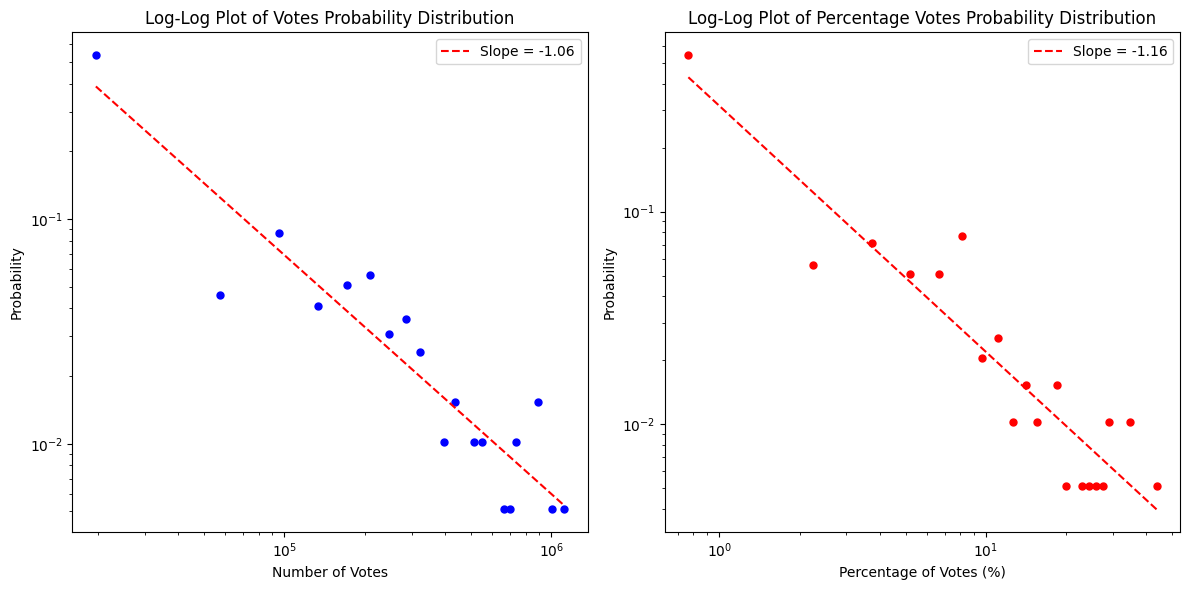

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import powerlaw

def read_election_data():
    # Assuming 'constants' module has 'years', 'all_voters', 'no_valid_vote' variables
    files = [(f'./real_data/NRSR{year}_clean.csv', year) for year in constants.years]
    all_data = []
    for file, year in files:
        df = pd.read_csv(file)
        df['Year'] = year
        all_data.append(df)
    combined_data = pd.concat(all_data, ignore_index=True)
    return combined_data

# Read election data
combined_data = read_election_data()

# Filter out political subjects with zero Subject Number
filtered_data = combined_data[combined_data["Subject Number"] > 0]

# Function to calculate log-likelihood ratio and p-value for power law distribution
def calculate_powerlaw_stats(data):
    results = powerlaw.Fit(data)
    R, p = results.distribution_compare('power_law', 'exponential', normalized_ratio=True)
    return R, p

# Prepare data for analysis
filtered_data["Total Voters"] = filtered_data["Year"].map(constants.all_voters)
filtered_data["No Valid Votes"] = filtered_data["Year"].map(constants.no_valid_vote)
filtered_data["Percentage"] = (filtered_data["Valid Votes"] / (filtered_data["Total Voters"] - filtered_data["No Valid Votes"])) * 100

# Calculate log-likelihood ratio and p-value for "Valid Votes"
valid_votes = filtered_data["Valid Votes"].values
R_votes, p_votes = calculate_powerlaw_stats(valid_votes)
print(f"Log-likelihood ratio (Votes): {R_votes}, p-value (Votes): {p_votes}")

# Calculate log-likelihood ratio and p-value for "Percentage"
percentages = filtered_data["Percentage"].values
R_percentage, p_percentage = calculate_powerlaw_stats(percentages)
print(f"Log-likelihood ratio (Percentage): {R_percentage}, p-value (Percentage): {p_percentage}")

# Function to plot log-log histograms with linear regression
def plot_log_log_histograms_with_regression(df):
    # Histogram for votes
    counts_votes, bins_votes = np.histogram(df["Valid Votes"], bins=30)
    bin_centers_votes = 0.5 * (bins_votes[1:] + bins_votes[:-1])
    prob_votes = counts_votes / counts_votes.sum()

    # Histogram for percentages
    counts_percentage, bins_percentage = np.histogram(df["Percentage"], bins=30)
    bin_centers_percentage = 0.5 * (bins_percentage[1:] + bins_percentage[:-1])
    prob_percentage = counts_percentage / counts_percentage.sum()

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot log-log plot of votes
    axes[0].loglog(bin_centers_votes, prob_votes, 'o', markersize=5, color='blue')
    axes[0].set_xlabel('Number of Votes')
    axes[0].set_ylabel('Probability')
    axes[0].set_title('Log-Log Plot of Votes Probability Distribution')
    
    # Linear regression for votes
    log_bin_centers_votes = np.log10(bin_centers_votes[prob_votes > 0])
    log_prob_votes = np.log10(prob_votes[prob_votes > 0])
    slope_votes, intercept_votes, _, _, _ = linregress(log_bin_centers_votes, log_prob_votes)
    regression_line_votes = 10**(intercept_votes + slope_votes * log_bin_centers_votes)
    axes[0].loglog(bin_centers_votes[prob_votes > 0], regression_line_votes, 'r--', label=f'Slope = {slope_votes:.2f}')
    axes[0].legend()

    # Plot log-log plot of percentages
    axes[1].loglog(bin_centers_percentage, prob_percentage, 'o', markersize=5, color='red')
    axes[1].set_xlabel('Percentage of Votes (%)')
    axes[1].set_ylabel('Probability')
    axes[1].set_title('Log-Log Plot of Percentage Votes Probability Distribution')
    
    # Linear regression for percentages
    log_bin_centers_percentage = np.log10(bin_centers_percentage[prob_percentage > 0])
    log_prob_percentage = np.log10(prob_percentage[prob_percentage > 0])
    slope_percentage, intercept_percentage, _, _, _ = linregress(log_bin_centers_percentage, log_prob_percentage)
    regression_line_percentage = 10**(intercept_percentage + slope_percentage * log_bin_centers_percentage)
    axes[1].loglog(bin_centers_percentage[prob_percentage > 0], regression_line_percentage, 'r--', label=f'Slope = {slope_percentage:.2f}')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# Plot the log-log plots with linear regression for the filtered data
plot_log_log_histograms_with_regression(filtered_data)


In [7]:
import powerlaw

def read_election_data():
    # Assuming 'constants' module has 'years', 'all_voters', 'no_valid_vote' variables
    files = [(f'./real_data/NRSR{year}_clean.csv', year) for year in constants.years]
    all_data = []
    for file, year in files:
        df = pd.read_csv(file)
        df['Year'] = year
        all_data.append(df)
    combined_data = pd.concat(all_data, ignore_index=True)
    return combined_data

# Read election data
combined_data = read_election_data()

# Filter out political subjects with zero Subject Number
filtered_data = combined_data[combined_data["Subject Number"] > 0]

# Prepare data for analysis
filtered_data["Total Voters"] = filtered_data["Year"].map(constants.all_voters)
filtered_data["No Valid Votes"] = filtered_data["Year"].map(constants.no_valid_vote)
filtered_data["Percentage"] = (filtered_data["Valid Votes"] / (filtered_data["Total Voters"] - filtered_data["No Valid Votes"])) * 100

# Function to perform goodness-of-fit tests
def goodness_of_fit_tests(data):
    results = powerlaw.Fit(data)

    # Goodness-of-fit test for power law
    D_powerlaw, p_powerlaw = results.distribution_compare('power_law', 'lognormal', normalized_ratio=True)

    # Goodness-of-fit test for exponential
    D_exponential, p_exponential = results.distribution_compare('exponential', 'lognormal', normalized_ratio=True)
    
    return D_powerlaw, p_powerlaw, D_exponential, p_exponential

# Calculate goodness-of-fit for "Valid Votes"
valid_votes = filtered_data["Valid Votes"].values
D_votes_powerlaw, p_votes_powerlaw, D_votes_exponential, p_votes_exponential = goodness_of_fit_tests(valid_votes)
print(f"KS test for Power Law (Votes): D = {D_votes_powerlaw:.4f}, p-value = {p_votes_powerlaw:.4f}")
print(f"KS test for Exponential (Votes): D = {D_votes_exponential:.4f}, p-value = {p_votes_exponential:.4f}")

# Calculate goodness-of-fit for "Percentage"
percentages = filtered_data["Percentage"].values
D_percentage_powerlaw, p_percentage_powerlaw, D_percentage_exponential, p_percentage_exponential = goodness_of_fit_tests(percentages)
print(f"KS test for Power Law (Percentage): D = {D_percentage_powerlaw:.4f}, p-value = {p_percentage_powerlaw:.4f}")
print(f"KS test for Exponential (Percentage): D = {D_percentage_exponential:.4f}, p-value = {p_percentage_exponential:.4f}")


Calculating best minimal value for power law fit
KS test for Power Law (Votes): D = -0.9698, p-value = 0.3322
KS test for Exponential (Votes): D = -0.6686, p-value = 0.5038
Calculating best minimal value for power law fit
KS test for Power Law (Percentage): D = -0.5643, p-value = 0.5725
KS test for Exponential (Percentage): D = -0.5610, p-value = 0.5748


C:\Users\janko\AppData\Local\Temp\ipykernel_2144\2544786128.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Total Voters"] = filtered_data["Year"].map(constants.all_voters)
C:\Users\janko\AppData\Local\Temp\ipykernel_2144\2544786128.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["No Valid Votes"] = filtered_data["Year"].map(constants.no_valid_vote)
C:\Users\janko\AppData\Local\Temp\ipykernel_2144\2544786128.py:23: SettingWithCopyWarning: 
A value is trying to be set o

In [8]:
import numpy as np
import pandas as pd
import powerlaw
import constants

def read_election_data():
    # Assuming 'constants' module has 'years', 'all_voters', 'no_valid_vote' variables
    files = [(f'./real_data/NRSR{year}_clean.csv', year) for year in constants.years]
    all_data = []
    for file, year in files:
        df = pd.read_csv(file)
        df['Year'] = year
        all_data.append(df)
    combined_data = pd.concat(all_data, ignore_index=True)
    return combined_data

# Read election data
combined_data = read_election_data()

# Filter out political subjects with zero Subject Number
filtered_data = combined_data[combined_data["Subject Number"] > 0]

# Prepare data for analysis
filtered_data["Total Voters"] = filtered_data["Year"].map(constants.all_voters)
filtered_data["No Valid Votes"] = filtered_data["Year"].map(constants.no_valid_vote)
filtered_data["Percentage"] = (filtered_data["Valid Votes"] / (filtered_data["Total Voters"] - filtered_data["No Valid Votes"])) * 100

# Function to perform goodness-of-fit tests
def goodness_of_fit_tests(data):
    results = powerlaw.Fit(data)

    # Goodness-of-fit test for power law
    D_powerlaw, p_powerlaw = results.distribution_compare('power_law', 'lognormal', normalized_ratio=True)

    # Goodness-of-fit test for exponential
    D_exponential, p_exponential = results.distribution_compare('exponential', 'lognormal', normalized_ratio=True)
    
    return D_powerlaw, p_powerlaw, D_exponential, p_exponential

# Calculate goodness-of-fit for "Valid Votes"
valid_votes = filtered_data["Valid Votes"].values
D_votes_powerlaw, p_votes_powerlaw, D_votes_exponential, p_votes_exponential = goodness_of_fit_tests(valid_votes)
print(f"KS test for Power Law (Votes): D = {D_votes_powerlaw:.4f}, p-value = {p_votes_powerlaw:.4f}")
print(f"KS test for Exponential (Votes): D = {D_votes_exponential:.4f}, p-value = {p_votes_exponential:.4f}")

# Calculate goodness-of-fit for "Percentage"
percentages = filtered_data["Percentage"].values
D_percentage_powerlaw, p_percentage_powerlaw, D_percentage_exponential, p_percentage_exponential = goodness_of_fit_tests(percentages)
print(f"KS test for Power Law (Percentage): D = {D_percentage_powerlaw:.4f}, p-value = {p_percentage_powerlaw:.4f}")
print(f"KS test for Exponential (Percentage): D = {D_percentage_exponential:.4f}, p-value = {p_percentage_exponential:.4f}")


Calculating best minimal value for power law fit
KS test for Power Law (Votes): D = -0.9698, p-value = 0.3322
KS test for Exponential (Votes): D = -0.6686, p-value = 0.5038
Calculating best minimal value for power law fit
KS test for Power Law (Percentage): D = -0.5643, p-value = 0.5725
KS test for Exponential (Percentage): D = -0.5610, p-value = 0.5748


C:\Users\janko\AppData\Local\Temp\ipykernel_2144\2425954290.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Total Voters"] = filtered_data["Year"].map(constants.all_voters)
C:\Users\janko\AppData\Local\Temp\ipykernel_2144\2425954290.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["No Valid Votes"] = filtered_data["Year"].map(constants.no_valid_vote)
C:\Users\janko\AppData\Local\Temp\ipykernel_2144\2425954290.py:26: SettingWithCopyWarning: 
A value is trying to be set o